## Playlists Exploratory Data Analysis

The `playlist.csv` file contains playlists data that includes the word `Bolivia` in either the `name` or `description` columns.

This notebook includes:
- Data Cleaning: chart and irrelevant playlists are removed.
- Visualizations
- Storage of clean dataset in `playlist_clean.csv`

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_csv('playlists_raw.csv')
df = df.sort_values(by='followers', ascending=False)
df = df.reset_index(drop=True)
df.shape

(50, 7)

In [3]:
df.head(10)

,playlist_id,name,followers,tracks,owner_name,owner_id,description
0,37i9dQZEVXbJqfMFK4d691,Bolivia Top 50,61840,50,spotifycharts,spotifycharts,Your daily update of the most played tracks in...
1,37i9dQZF1DX3JGBBuBxYKW,Cumbieras,40216,65,Spotify,spotify,"Reinas de la cumbia, de hoy y de siempre. Foto..."
2,37i9dQZEVXbMTKZuy8ORFV,Bolivia Viral 50,11433,50,spotifycharts,spotifycharts,Your daily update of the most viral tracks in ...
3,6CyUiJyJ4Enu2mCrgXlcp9,Lamento Boliviano,6370,321,Valerie Marie,valerie1193,NaN
4,321jPs2Obj2j8qzroYv4S2,La Previa en Bolivia by Dj Micky,5267,61,Filtr Bolivia,i70njzkxhiqhv01720gh1eujm,Dale play y que empiece la fiesta! Foto: DJ Micky
5,37i9dQZF1DXcU9MUSqc5Ok,Made in Bolivia,4977,50,Spotify,spotify,Representando la cultura con orgullo. Represen...
6,3L0GTgyBzx3cITSPBqE5CE,Top 50 Bolivia,3535,50,kolibrimusic,kolibrimusic,The Top 50 tracks in Bolivia right now 🎯 Los 5...
7,37i9dQZF1DXcaON5GWABL3,Top Canciones Bolivia 2019,2735,50,Spotify,spotify,Las canciones más escuchadas del año. Foto: Ma...
8,4Vo04i7qwfew7LtHukfAh8,Musica boliviana 🙂,2632,62,wilda.valencia,wilda.valencia,NaN
9,3b9zB3X9JQPxrznZD5lfxy,TINKU'S BOLIVIANOS,2275,101,Rodolfo M. Arze Flores,rodoarze,"El Tinku es una ceremonia milenaria, que se fe..."


In [4]:
df.loc[1].description

'Reinas de la cumbia, de hoy y de siempre. Foto: Miss Bolivia.'

### Remove Irrelevant content

Keep items with name including the country's name (_'Bolivia'_ , _'bolivia'_ or _'BOLIVIA'_ ). And exclude _'Lamento'_ because "Lamento Boliviano" is a song of an argentinian group.

In [5]:
df = df[df.name.str.contains('olivia|OLIVIA') & ~df.name.str.contains('Lamento|lamento')]
df.shape

(46, 7)

Removing charts playlists for Bolivia and other irrelevant items.

In [6]:
remove_ids = [
    '37i9dQZEVXbJqfMFK4d691', # Bolivia Top 50
    '37i9dQZEVXbMTKZuy8ORFV', # Bolivia Viral 50
    '7xg9H8UArAZRNW4UbtkuYG', # TOP HITS BOLIVIA
    '321jPs2Obj2j8qzroYv4S2', # La Previa Dj Micky
    '37i9dQZF1DX2LWCSft2vqi', # Top Artistas 2019
    '3L0GTgyBzx3cITSPBqE5CE', # Top 50
    '37i9dQZF1DXcaON5GWABL3', # Top 2019
    '1OciHZQgk4kMSxhVYivJLQ', # Martin Stephenson And The Daintees – Boat To Bolvia
    '2MGqkd7u2u87tLLFyzJ7DH', # Bolivia Top 100
]
df = df[~df.playlist_id.isin(remove_ids)]
df.shape

(38, 7)

In [7]:
df

,playlist_id,name,followers,tracks,owner_name,owner_id,description
5,37i9dQZF1DXcU9MUSqc5Ok,Made in Bolivia,4977,50,Spotify,spotify,Representando la cultura con orgullo. Represen...
8,4Vo04i7qwfew7LtHukfAh8,Musica boliviana 🙂,2632,62,wilda.valencia,wilda.valencia,NaN
9,3b9zB3X9JQPxrznZD5lfxy,TINKU'S BOLIVIANOS,2275,101,Rodolfo M. Arze Flores,rodoarze,"El Tinku es una ceremonia milenaria, que se fe..."
10,03ZSUNsVsoAeZKExgjnhUB,"Kjarkas, Proyección, Pacha, Tupay y Chila Jatu...",1924,94,jfrodriguez2002,jfrodriguez2002,Las mejores canciones del famoso grupo folklor...
11,211g8JAEFEqB9HnJyqSA3R,Rock Boliviano,1823,265,Daniel Arancibia,danielarancibiamusic,NaN
13,2XfYxfqzUZl1ZVIF1htNQk,Cumbia boliviana del recuerdo,1716,74,Gabriel Parada Trigo,gaboparadatrigo,NaN
14,5q6nmqaLJqtiWJwbv9I8i0,SALAY 🇧🇴 BOLIVIA LA PAZ,1604,13,Luis Fernando Garcia,12132490305,MUSICA FOLKLORICA BOLIVIANA
15,6UdNU7zliQhLYyYEe2pFYY,Bolivia folklore,1198,197,Jowell Ticlla,21iebp5hjbszblserre4tttjq,NaN
16,3eWL716NDY8CSDVZvh8Udo,"Elias Ayaviri, Mc J Rap ♡Rap Boliviano 🇧🇴♡",1186,97,Juan Carlos Zurita Bustos,12168646266,En esta Playlist encontraras Rap Romantico Bol...
17,2zvn0gdOKh4xiMTqn9CVAk,Bolivian Music,1146,179,Carmen Canedo,1222614869,música boliviana


### Exploratory Data Analysis

In [8]:
print("Total tracks: ", df.tracks.sum())

Total tracks:  4130


In [9]:
df[['tracks']].describe()

,tracks
count,38.000000
mean,108.684211
std,95.624294
min,9.000000
25%,50.000000
50%,79.000000
75%,146.750000
max,477.000000


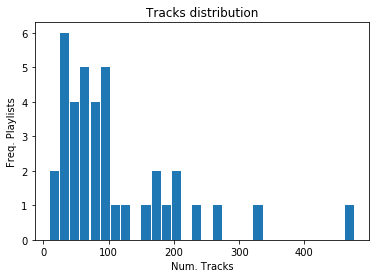

In [10]:
ax = df.tracks.plot.hist(bins=30, rwidth=0.9, title="Tracks distribution")
ax.set_xlabel("Num. Tracks"); ax.set_ylabel("Freq. Playlists");

## Number of followers

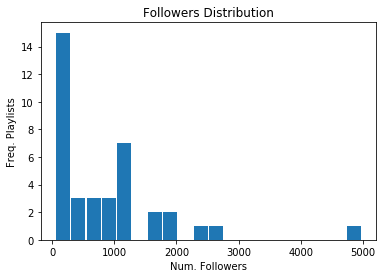

In [11]:
ax = df.followers.plot.hist(bins=20, rwidth=0.9, title="Followers Distribution")
ax.set_xlabel("Num. Followers"); ax.set_ylabel("Freq. Playlists");

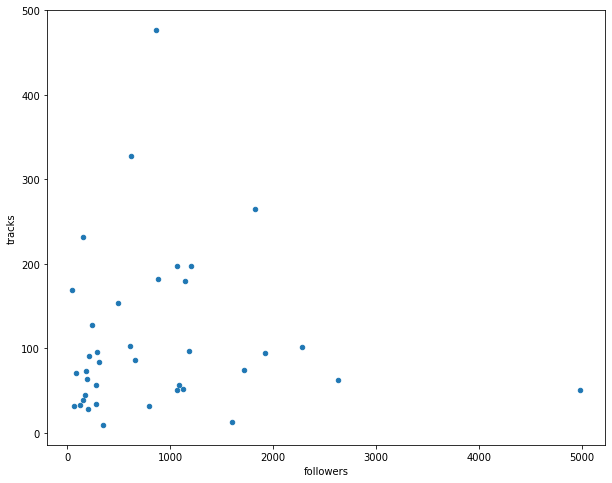

In [12]:
df.plot.scatter(x='followers', y='tracks', figsize=(10,8))